# Importing Libraries

In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the apple stock data

**We will be using apple stock data for our stock prediction purpose**

In [2]:
file='gs.us.txt'
data=pd.read_csv(file,sep=',')
data.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1,1999-05-05,62.213,62.213,58.991,61.547,8295140,0
2,1999-05-06,60.542,61.773,59.712,60.488,3185852,0
3,1999-05-07,60.488,66.671,59.429,65.998,5331091,0
4,1999-05-10,65.331,65.441,62.549,62.941,2839054,0


**Parsing the date into appropriate format and making it as index column**

In [3]:
dateparse=lambda date:pd.datetime.strptime(date,'%Y-%m-%d')
data=pd.read_csv(file,sep=',',index_col='Date',date_parser=dateparse)
data.head(5)


,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1999-05-04,67.665,68.780,62.329,62.659,24472946,0
1999-05-05,62.213,62.213,58.991,61.547,8295140,0
1999-05-06,60.542,61.773,59.712,60.488,3185852,0
1999-05-07,60.488,66.671,59.429,65.998,5331091,0
1999-05-10,65.331,65.441,62.549,62.941,2839054,0


# Plotting

**This is OPEN price for apple stock**

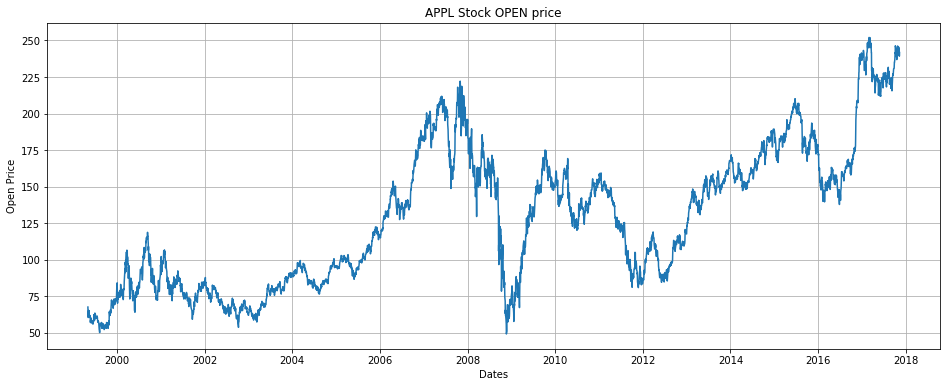

In [4]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Price')
plt.title('APPL Stock OPEN price')
plt.plot(data['Open'])
plt.show()

**This is CLOSE price for apple stock**

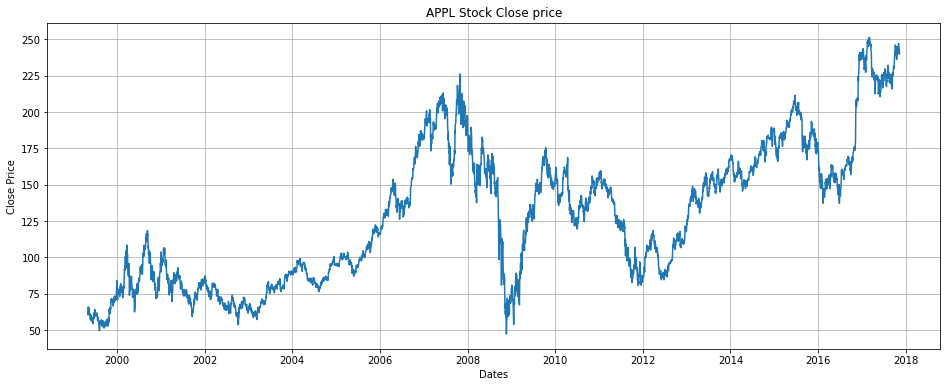

In [5]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.title('APPL Stock Close price')
plt.plot(data['Close'])
plt.show()

### Observations:-
**As we can see there is not so much of difference in open and close price.**

# Selecting start and end date

**We will select date range from 1999 to 2005**

In [209]:

start_date = '1999-05-04'
end_date = '2005-12-31'
weekday=pd.date_range(start=start_date,end=end_date,freq='B')
new_data=data.reindex(weekday)
new_data=new_data.fillna(method='ffill')

**Checking if NaN value exists**

In [210]:
new_data.isna().any()

Open       False
High       False
Low        False
Close      False
Volume     False
OpenInt    False
dtype: bool

In [211]:
new_data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1739.000000,1739.000000,1739.000000,1739.000000,1.739000e+03,1739.0
mean,81.838708,83.031324,80.690661,81.882822,3.484227e+06,0.0
std,14.949612,15.058690,14.907674,14.999936,2.394259e+06,0.0
min,50.191000,51.031000,49.242000,49.698000,1.179760e+05,0.0
25%,70.900000,71.817000,69.553500,70.831000,2.202530e+06,0.0
50%,80.912000,82.312000,79.787000,80.991000,3.306128e+06,0.0
75%,92.834500,94.321000,91.125000,92.838000,4.363672e+06,0.0
max,122.500000,123.100000,122.250000,122.330000,6.050659e+07,0.0


# Simple rolling moving average

### We are going to use simple moving average and plot the results

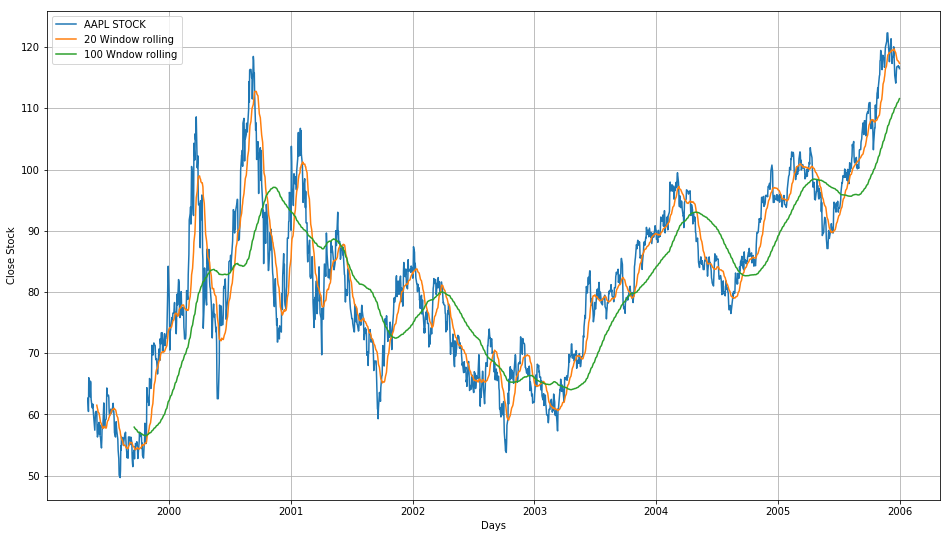

In [212]:

close=new_data['Close']
rolling_20=close.rolling(window=20).mean()
rolling_100=close.rolling(window=100).mean()
fig,ax=plt.subplots(figsize=(16,9))
ax.grid(True)
ax.set_xlabel('Days')
ax.set_ylabel('Close Stock')
ax.plot(close,label='AAPL STOCK')
ax.plot(rolling_20,label='20 Window rolling')
ax.plot(rolling_100,label='100 Wndow rolling')
ax.legend()

# Exponential Moving average

### Here we are using exponential moving average which is better than SMAE

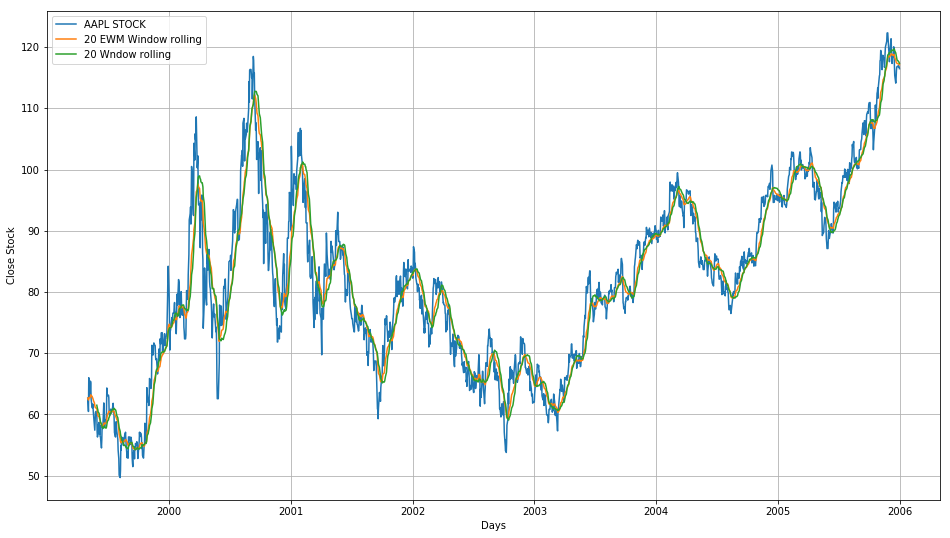

In [213]:

close=new_data['Close']
rolling_20_ewm=close.ewm(span=20,adjust=False).mean()
rolling_20=close.rolling(window=20).mean()
fig,ax=plt.subplots(figsize=(16,9))
ax.grid(True)
ax.set_xlabel('Days')
ax.set_ylabel('Close Stock')
ax.plot(close,label='AAPL STOCK')
ax.plot(rolling_20_ewm,label='20 EWM Window rolling')
ax.plot(rolling_20,label='20 Wndow rolling')
ax.legend(loc='best')

# Daily return i.e Close-Open

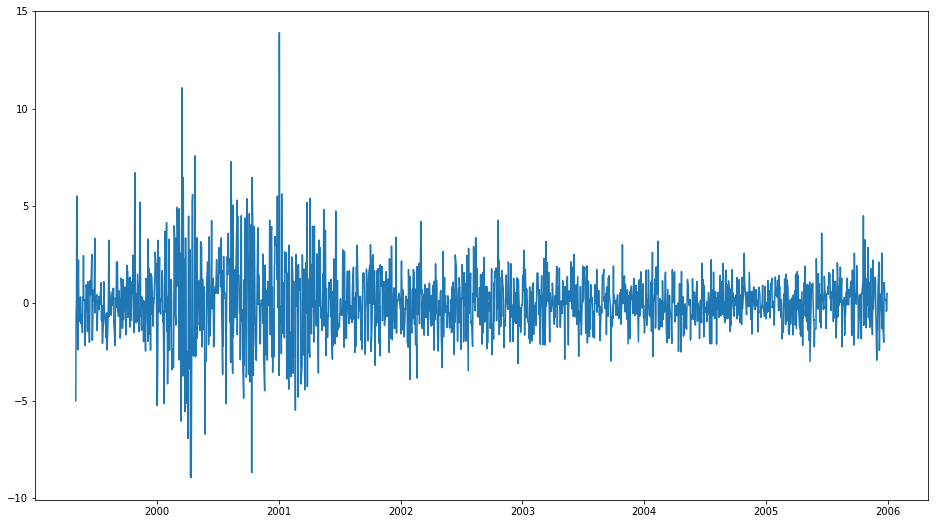

In [214]:

def daily_return(df):
    #df1=df.copy()
    df=df['Close']-df['Open']
    return df
return_data=daily_return(new_data)
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(return_data)

# Splitting into Train and Test

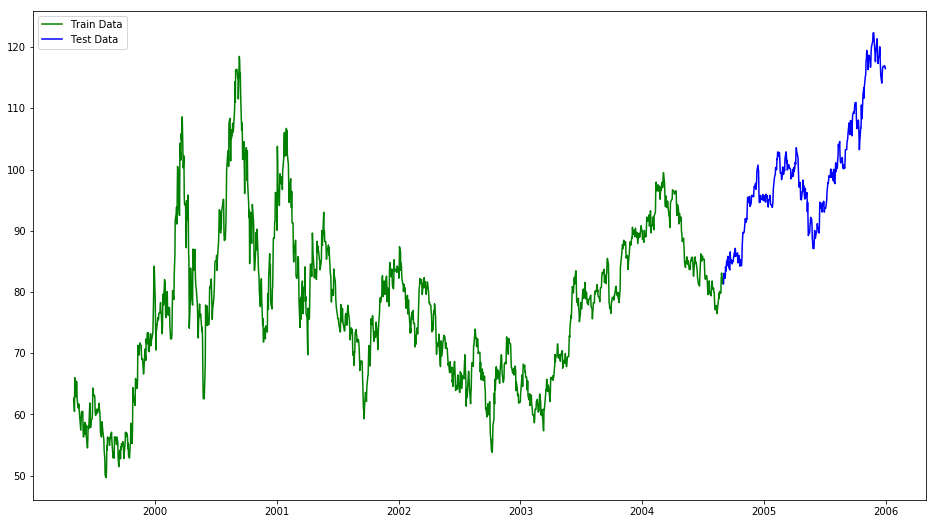

In [215]:

train_data,test_data=new_data['Close'][:int(0.8*len(new_data))],new_data['Close'][int(0.8*len(new_data)):]
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(train_data,'green',label='Train Data')
ax.plot(test_data,'blue',label='Test Data')
ax.legend()


**A lag plot to check the stationarity**

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


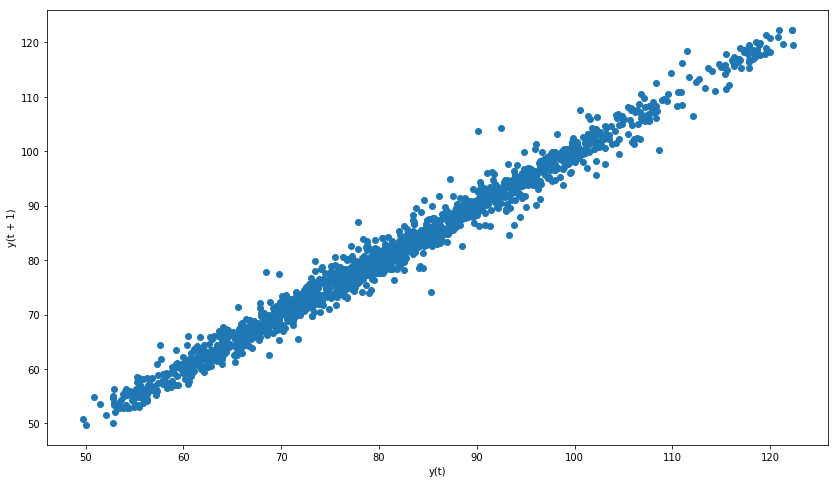

In [216]:
pd.tools.plotting.lag_plot(new_data['Close'])

**Creating the dataset for further processing**

In [14]:
tmp_frame=pd.concat([train_data.shift(1),train_data],axis=1)
tmp_frame.columns=['t-1','t']
print(tmp_frame.corr())
tmp_frame.head(5)

          t-1         t
t-1  1.000000  0.985633
t    0.985633  1.000000


,t-1,t
1999-05-04,NaN,62.659
1999-05-05,62.659,61.547
1999-05-06,61.547,60.488
1999-05-07,60.488,65.998
1999-05-10,65.998,62.941


# Simple predictions using previous value as predicted value

 mean square error: 1.2769730000000008


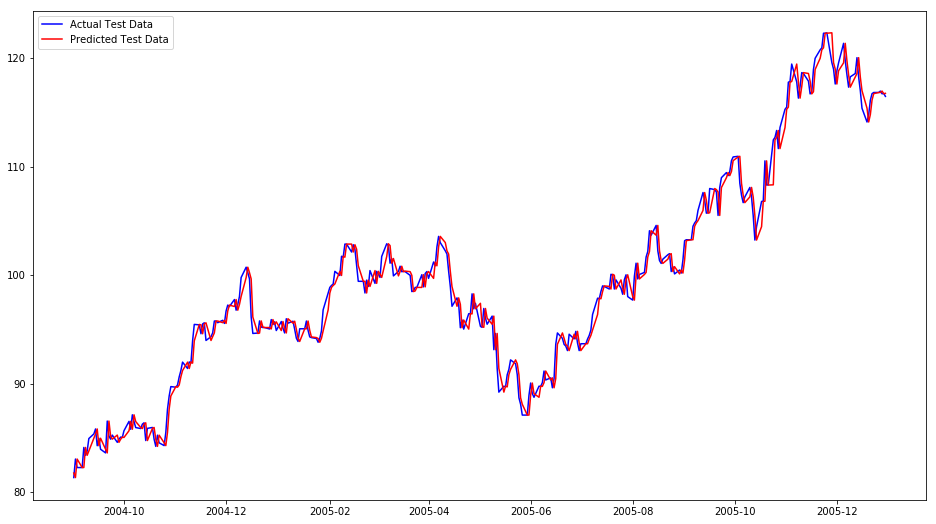

In [218]:

from sklearn.metrics import mean_squared_error as mse
tmp_data=pd.concat([close.shift(1),close],axis=1)
tmp_data.columns=['t-1','t']
#print(tmp_data.head(5))
train,test=tmp_data[1:int(0.8*len(tmp_data))],tmp_data[int(0.8*len(tmp_data)):]
train_x,train_y=train.iloc[:,0],train.iloc[:,1]
test_x,test_y=test.iloc[:,0],test.iloc[:,1]


predictions=[]
for x in test_x:
    predictions.append(x)
error=mse(test_y,predictions)
print(" mean square error: "+str(error))

fig,ax=plt.subplots(figsize=(16,9))
#ax.plot(train_data,'green',label='Train Data')
ax.plot(test_data,'blue',label='Actual Test Data')
ax.plot(test_data.index,predictions,'red',label='Predicted Test Data')
ax.legend()
plt.show()

## Observation:
### Here mean squared error is 1.276973

# Using Auto regressive model from statsmodel 

Lag: 23
mean Squared error: 1.4458774964854484


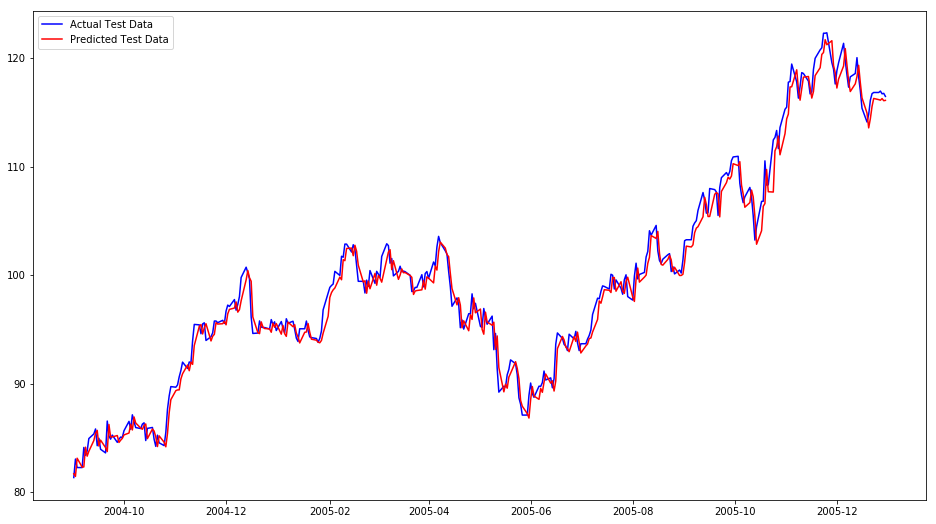

In [219]:

from statsmodels.tsa.ar_model import AR
model=AR(train_data)
model_fit=model.fit()
coef=model_fit.params
window=model_fit.k_ar
print("Lag: "+str(model_fit.k_ar))

history = train_data[len(train_data)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_data)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test_data[t]                             #   Here i am confused why we are taking test_data point as observed value
                                                   #    We should use the yhat as new point in our data. If i use the predicted
                                                   #     yhat value ( in the next cell ), my prediction is invalid
    predictions.append(yhat)
    history.append(obs)
    




error=mse(test_data,predictions)
print("mean Squared error: "+str(error))


fig,ax=plt.subplots(figsize=(16,9))
#ax.plot(train_data,'green',label='Train Data')
ax.plot(test_data,'blue',label='Actual Test Data')
ax.plot(test_data.index,predictions,'red',label='Predicted Test Data')
ax.legend()
plt.show()

## Observations:-
**We obtained lag=23**<br>
**We are going to use this for rest of the notebook**<br>
**Mean squared error:- 1.44587**

In [221]:
import numpy as np

### Checking for stationarity of data

In [223]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(close)

Results of Dickey-Fuller Test:
Test Statistic                   -2.012812
p-value                           0.280984
#Lags Used                        2.000000
Number of Observations Used    1736.000000
Critical Value (10%)             -2.567657
Critical Value (1%)              -3.434122
Critical Value (5%)              -2.863206
dtype: float64


### Here test statistic is similar to critical value. But according to procedure teststatistic>criticalvalue. So we accept the null hypothesis i.e the series is not stationary

### So i coverted it by seasonal differencing. Here 23 is lag value

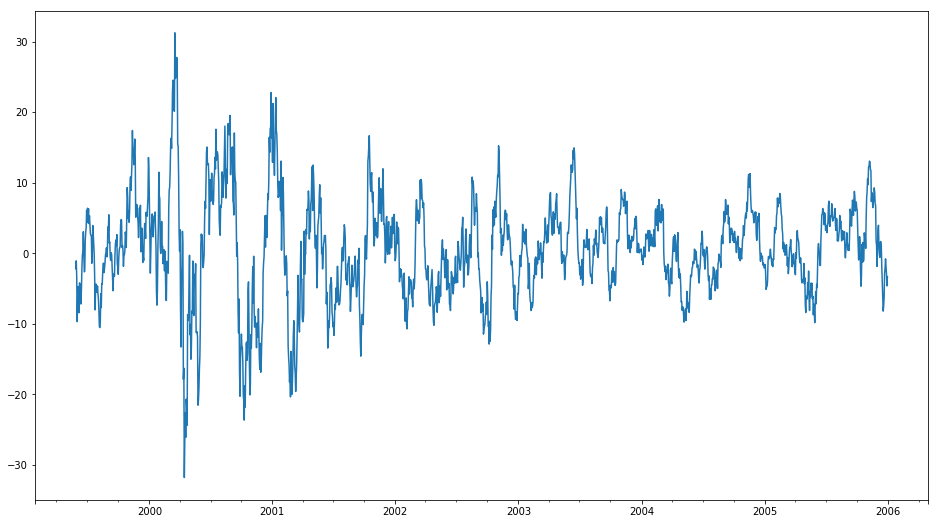

In [224]:
close_tmp=np.log(close)
tmp_data=close-close.shift(18)
plt.subplots(figsize=(16,9))
tmp_data=tmp_data.dropna()
tmp_data.dropna().plot()

<Figure size 1152x576 with 0 Axes>

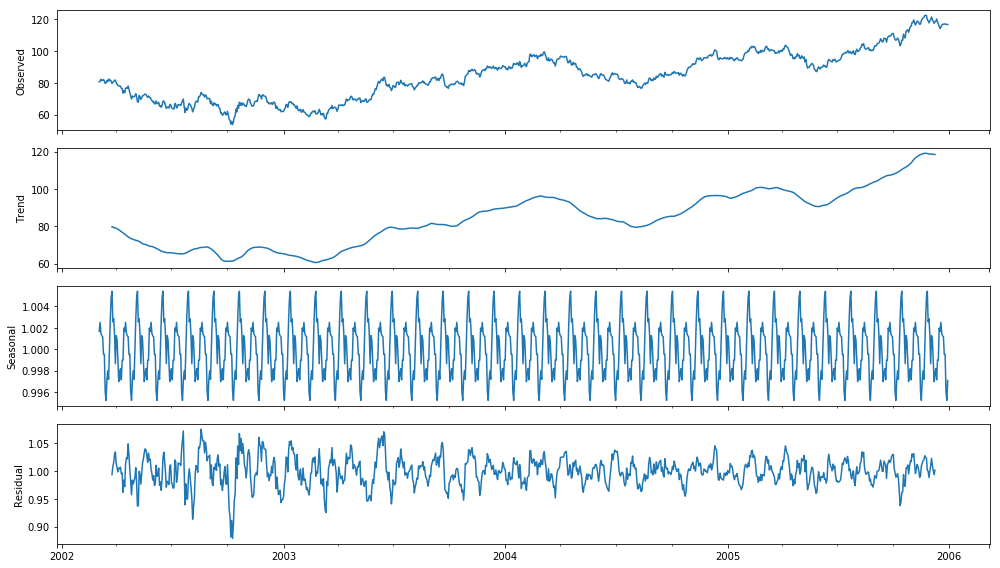

In [227]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
data_arima = close
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model='multiplicative', freq=30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

# Using ARIMA Model

In [228]:
from statsmodels.tsa.arima_model import ARIMA
train_arima = train_data
test_arima = test_data

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
# report performance
msea = mse(y, predictions)
print('MSE: '+str(msea))
mae = mse(y, predictions)
print('MAE: '+str(mae))
rmse = np.math.sqrt(mse(y, predictions))
print('RMSE: '+str(rmse))

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. I

MSE: 1.2808036068303374
MAE: 1.2808036068303374
RMSE: 1.1317259415734613


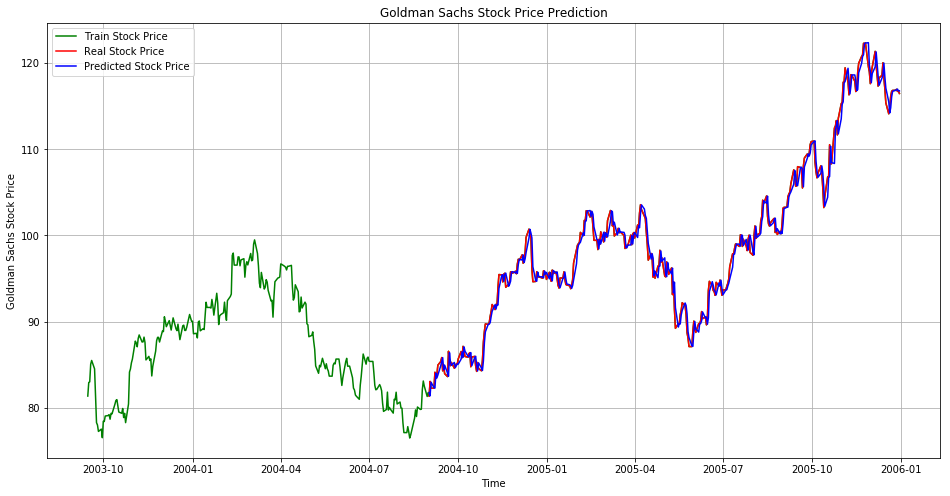

In [229]:
plt.figure(figsize=(16,8))
plt.plot(close.index[-600:], close.tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Goldman Sachs Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Goldman Sachs Stock Price')
plt.legend()
plt.grid(True)
#plt.savefig('arima_model.pdf')
plt.show()

# Using deep learning Technique(LSTM) 

In [230]:
new_data[:5]

,Open,High,Low,Close,Volume,OpenInt
1999-05-04,67.665,68.780,62.329,62.659,24472946.0,0.0
1999-05-05,62.213,62.213,58.991,61.547,8295140.0,0.0
1999-05-06,60.542,61.773,59.712,60.488,3185852.0,0.0
1999-05-07,60.488,66.671,59.429,65.998,5331091.0,0.0
1999-05-10,65.331,65.441,62.549,62.941,2839054.0,0.0


In [231]:
from sklearn.preprocessing import MinMaxScaler

## Splitting into Train-test

In [233]:
new_data1=new_data.iloc[:,0:5]
train_lstm1,test_lstm1=new_data1[:int(0.8*len(new_data1))],new_data1[int(0.8*len(new_data1)):]

## Normalizing Data

In [234]:
scaler=MinMaxScaler()
train_lstm=scaler.fit_transform(train_lstm1)
test_lstm=scaler.transform(test_lstm1)

## Preparing data for LSTM input

In [235]:
time_step=18
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for i in range(time_step,len(train_lstm)):
    x_train.append(train_lstm[i-time_step:i])
    y_train.append(train_lstm[i,3])
for i in range(time_step,len(test_lstm)):
    x_test.append(test_lstm[i-time_step:i])
    y_test.append(test_lstm[i,3])
x_train,y_train,x_test,y_test=np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)
print(x_train.shape)
print(y_train.shape)

(1373, 18, 5)
(1373,)


In [236]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [237]:
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(18 ,5),  kernel_initializer='glorot_normal'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(20,activation='relu'))
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 100)               42400     
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 21        
Total params: 44,441
Trainable params: 44,441
Non-trainable params: 0
_________________________________________________________________


In [238]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train, y_train, epochs = 50, batch_size = 32,
              validation_data=(x_test, y_test))

Train on 1373 samples, validate on 330 samples
Epoch 1/50
1373/1373 [==============================] - 6s 4ms/step - loss: 0.0264 - val_loss: 0.0135
Epoch 2/50
1373/1373 [==============================] - 2s 2ms/step - loss: 0.0065 - val_loss: 0.0093
Epoch 3/50
1373/1373 [==============================] - 2s 2ms/step - loss: 0.0050 - val_loss: 0.0076
Epoch 4/50
1373/1373 [==============================] - 2s 2ms/step - loss: 0.0042 - val_loss: 0.0052
Epoch 5/50
1373/1373 [==============================] - 2s 2ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 6/50
1373/1373 [==============================] - 2s 2ms/step - loss: 0.0030 - val_loss: 0.0016
Epoch 7/50
1373/1373 [==============================] - 2s 2ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 8/50
1373/1373 [==============================] - 2s 2ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 9/50
1373/1373 [==============================] - 2s 2ms/step - loss: 0.0028 - val_loss: 0.0060
Epoch 10/50
1373/1373 [============

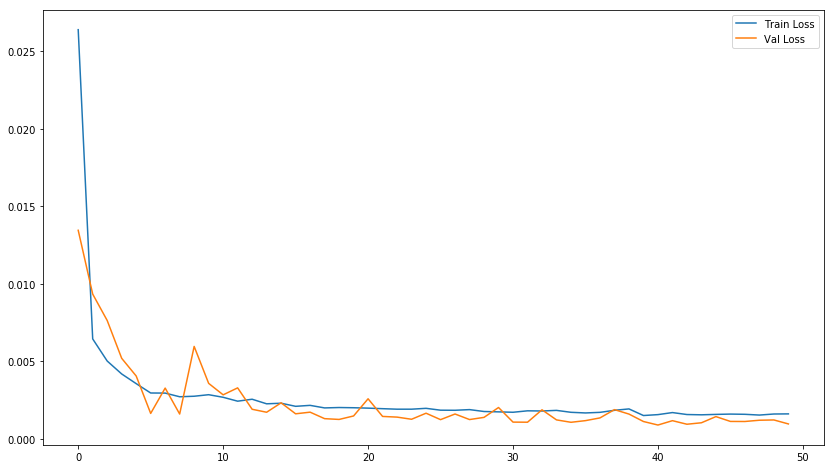

In [245]:
plt.plot(lstm_model.history.history['loss'],label='Train Loss')
plt.plot(lstm_model.history.history['val_loss'],label='Val Loss')
plt.legend()

**Here we can observe that loss decreases gradually and its much better than normal statistical model**

## Preparing data for test prediction

In [239]:
combine = pd.concat((train_lstm1, test_lstm1), axis = 0)
# our test inputs also contains stock open Prices of last timesteps dates (as described above)
test_inputs = combine[len(combine) - len(test_lstm1) - 18:].values
test_inputs = test_inputs.reshape(-1,5)
test_inputs = scaler.transform(test_inputs)

In [240]:
X_test = []
for i in range(18, test_lstm1.shape[0]+18):
    X_test.append(test_inputs[i-18:i])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
predicted_stock_price = lstm_model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price = (predicted_stock_price * scaler.data_range_[3]) + scaler.data_min_[3]

In [172]:
predicted.shape

(121, 1)

In [173]:
test_lstm1.shape

(139, 5)

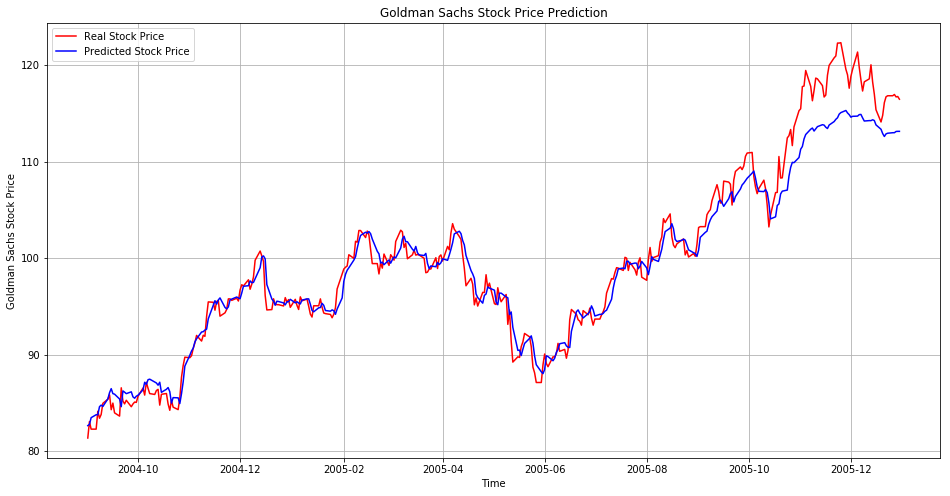

In [241]:
plt.figure(figsize=(16,8))
#plt.plot(train_lstm1.iloc[:,3], color='green', label = 'Train Stock Price')
plt.plot(test_lstm1.iloc[:,3] ,color = 'red', label = 'Real Stock Price')
plt.plot(test_lstm1.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Goldman Sachs Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Goldman Sachs Stock Price')
plt.legend()
plt.grid(True)
#plt.savefig('arima_model.pdf')
plt.show()